In [20]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## **Data Preparation**

In [21]:
data = pd.read_csv("/content/second_hand_car_regression.csv")
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [22]:
data.shape

(1000, 12)

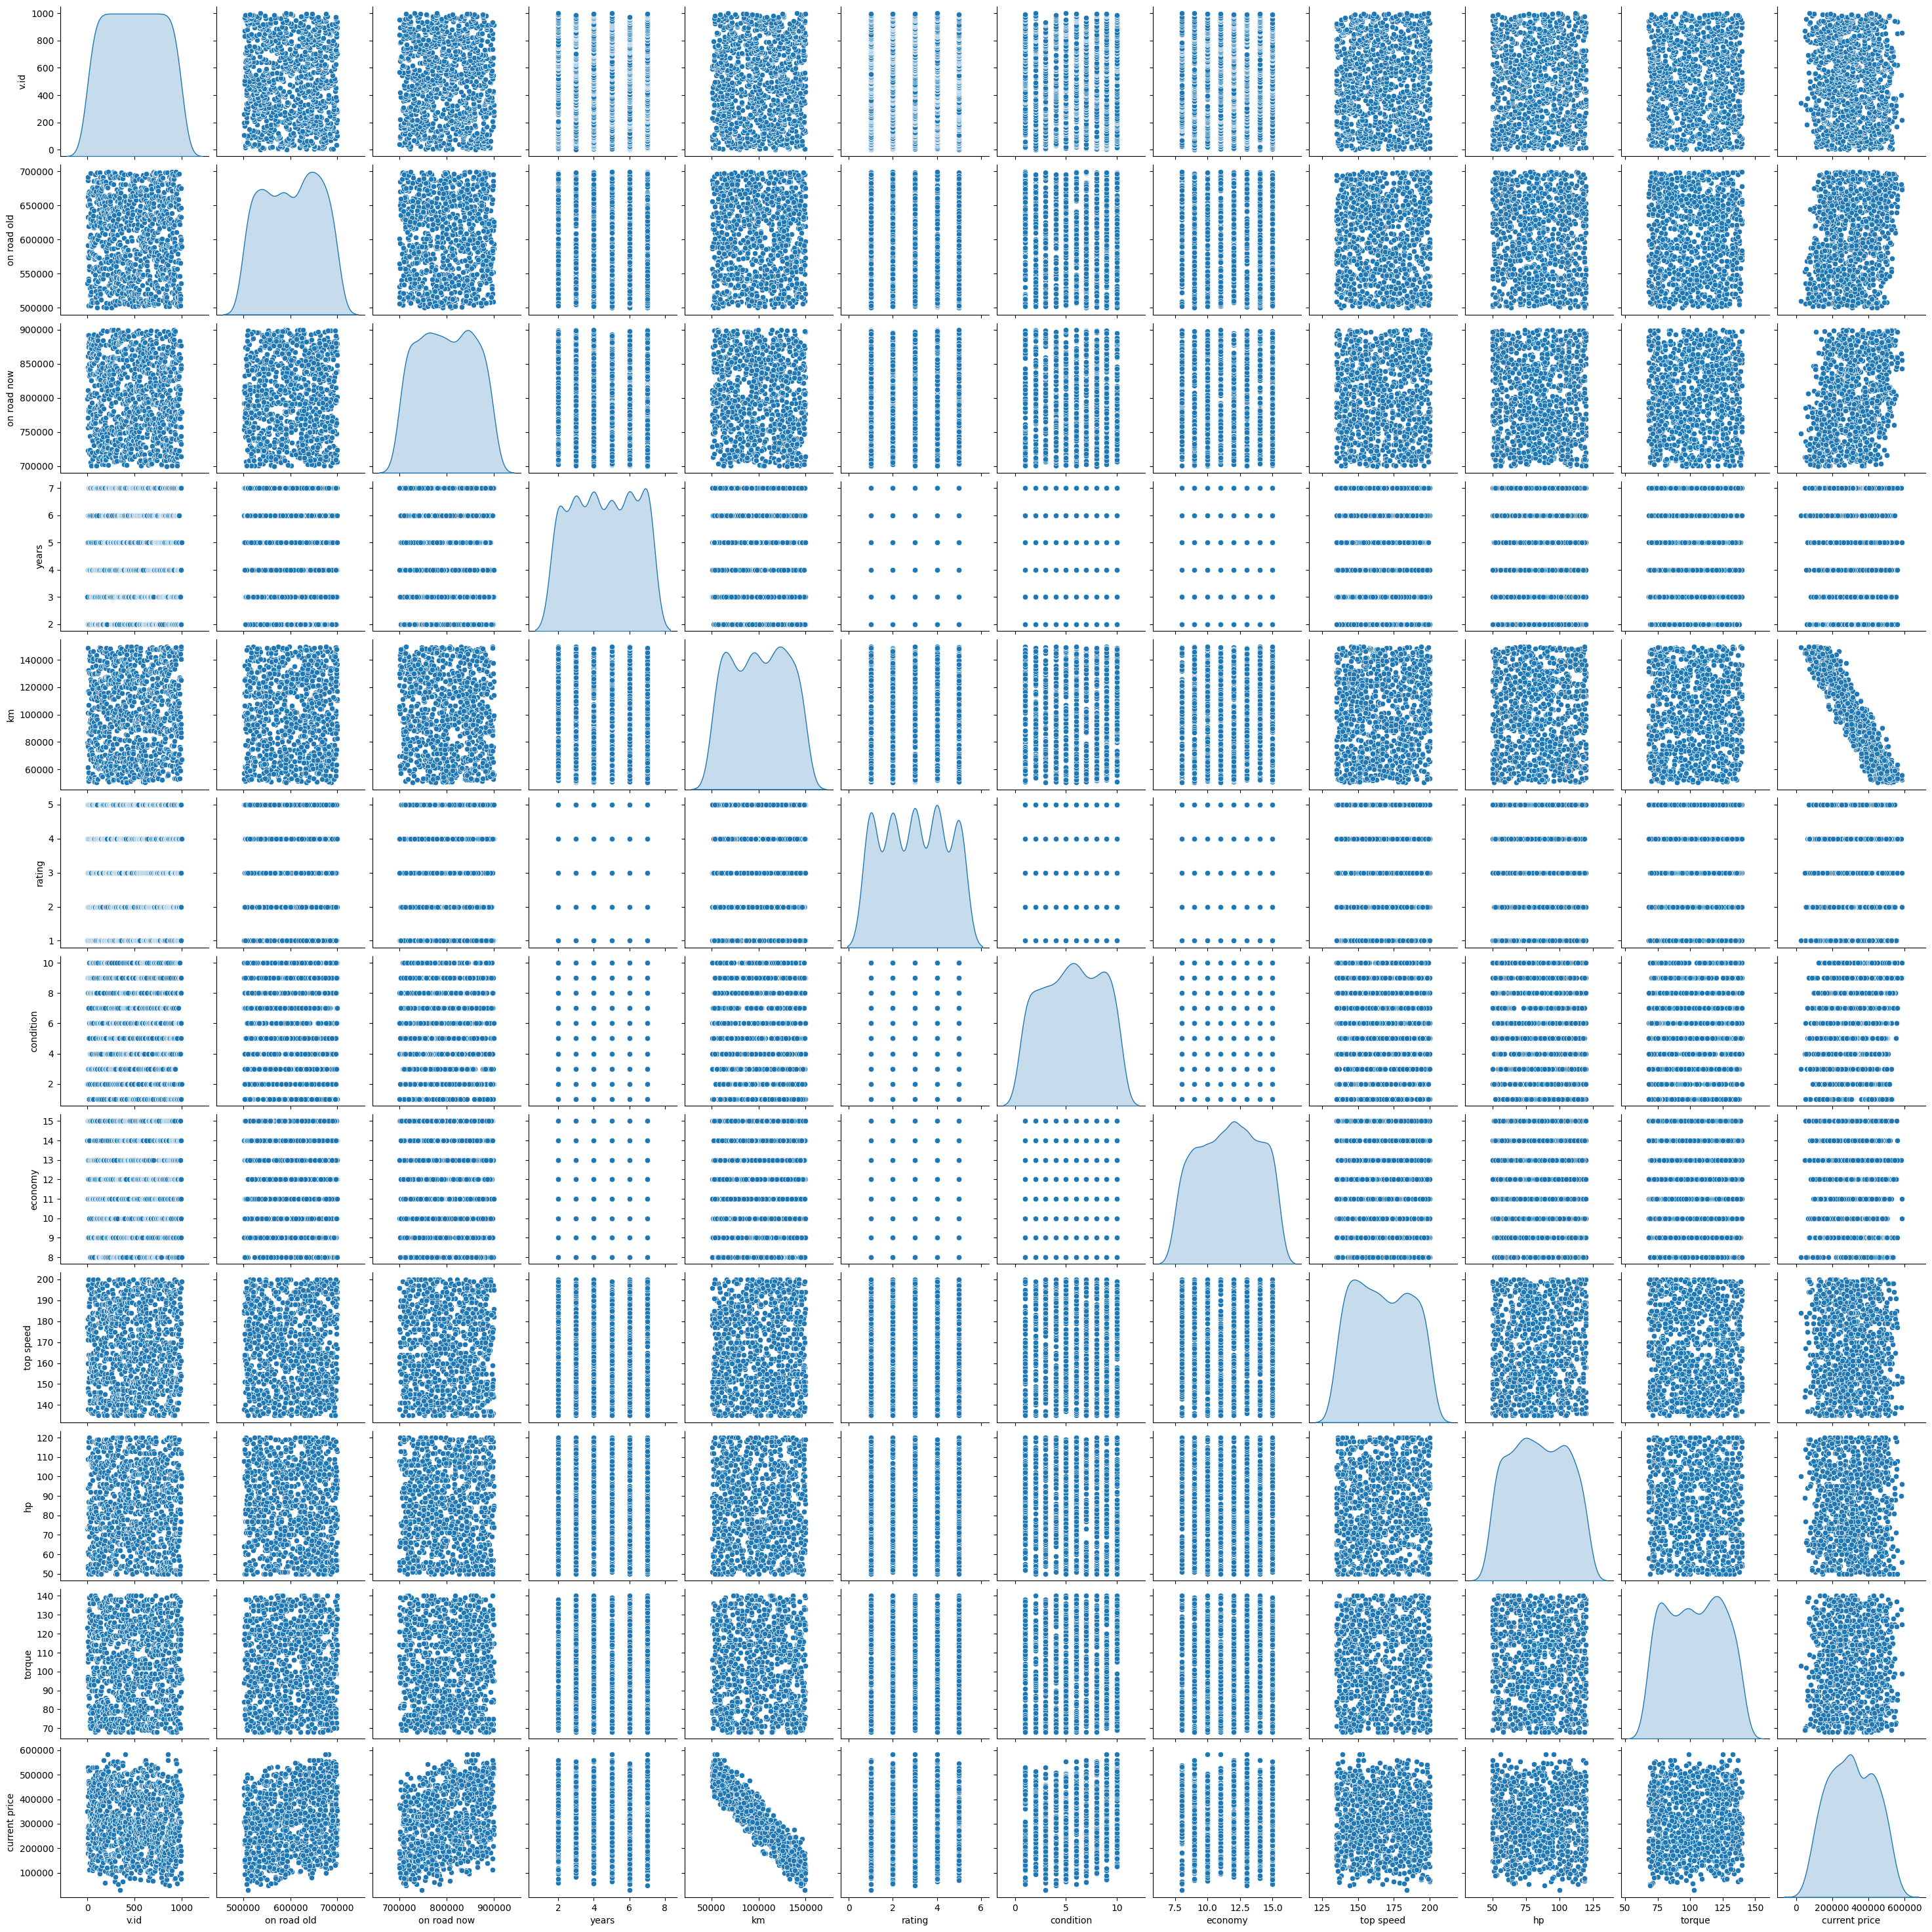

In [23]:
sns.pairplot(data, diag_kind='kde')

In [24]:
# converting dataframe to tensor
tensor_data = tf.constant(data)
print(tensor_data[0][0])
print(type(tensor_data[0][0]))
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(1.0, shape=(), dtype=float64)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [25]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[6.070000e+02 6.101430e+05 7.922130e+05 2.000000e+00 5.563000e+04
  2.000000e+00 9.000000e+00 1.300000e+01 1.670000e+02 8.500000e+01
  7.800000e+01 5.084320e+05]
 [8.200000e+01 5.481290e+05 8.630550e+05 2.000000e+00 7.725000e+04
  2.000000e+00 8.000000e+00 1.500000e+01 1.840000e+02 1.140000e+02
  1.010000e+02 4.132880e+05]
 [5.500000e+01 6.027220e+05 8.349490e+05 4.000000e+00 1.191310e+05
  1.000000e+00 3.000000e+00 9.000000e+00 1.810000e+02 1.050000e+02
  1.370000e+02 2.421735e+05]
 [1.170000e+02 6.295870e+05 8.189140e+05 2.000000e+00 7.416100e+04
  4.000000e+00 9.000000e+00 1.100000e+01 1.790000e+02 1.000000e+02
  1.070000e+02 4.578805e+05]
 [8.020000e+02 5.282560e+05 7.730690e+05 6.000000e+00 1.483740e+05
  2.000000e+00 7.000000e+00 1.300000e+01 1.370000e+02 6.500000e+01
  9.000000e+01 6.192850e+04]], shape=(5, 12), dtype=float32)


In [26]:
# removing v.id,	on road old,on road now and target column current price
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[2.00000e+00 5.56300e+04 2.00000e+00 9.00000e+00 1.30000e+01 1.67000e+02
  8.50000e+01 7.80000e+01]
 [2.00000e+00 7.72500e+04 2.00000e+00 8.00000e+00 1.50000e+01 1.84000e+02
  1.14000e+02 1.01000e+02]
 [4.00000e+00 1.19131e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.81000e+02
  1.05000e+02 1.37000e+02]
 [2.00000e+00 7.41610e+04 4.00000e+00 9.00000e+00 1.10000e+01 1.79000e+02
  1.00000e+02 1.07000e+02]
 [6.00000e+00 1.48374e+05 2.00000e+00 7.00000e+00 1.30000e+01 1.37000e+02
  6.50000e+01 9.00000e+01]], shape=(5, 8), dtype=float32)


In [27]:
y = tensor_data[:,-1]
print(y[:5].shape)
# making y 2 dimensional tensor
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[508432. ]
 [413288. ]
 [242173.5]
 [457880.5]
 [ 61928.5]], shape=(5, 1), dtype=float32)


In [28]:
# normalizing data
normalizer = Normalization(axis = -1, mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [29]:
# normalization example
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)   # it will get mean and variance by itself
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [30]:
print(X.shape,y.shape)

(1000, 8) (1000, 1)


In [31]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [32]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [33]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [16]:
# for x,y in train_dataset:
#   print(x,y)
#   break

tf.Tensor(
[[4.00000e+00 6.02140e+04 3.00000e+00 6.00000e+00 1.20000e+01 1.48000e+02
  9.80000e+01 8.70000e+01]
 [3.00000e+00 1.20144e+05 4.00000e+00 6.00000e+00 1.00000e+01 1.90000e+02
  8.00000e+01 8.80000e+01]
 [6.00000e+00 1.49191e+05 1.00000e+00 3.00000e+00 8.00000e+00 1.84000e+02
  1.00000e+02 1.03000e+02]
 [7.00000e+00 1.40455e+05 4.00000e+00 5.00000e+00 1.30000e+01 1.37000e+02
  7.10000e+01 8.60000e+01]
 [2.00000e+00 7.33130e+04 4.00000e+00 1.00000e+01 1.30000e+01 1.64000e+02
  5.30000e+01 9.60000e+01]
 [6.00000e+00 1.24610e+05 3.00000e+00 1.00000e+00 1.10000e+01 1.59000e+02
  7.10000e+01 1.27000e+02]
 [2.00000e+00 1.21747e+05 4.00000e+00 1.00000e+00 1.00000e+01 1.92000e+02
  8.50000e+01 1.11000e+02]
 [5.00000e+00 1.34781e+05 4.00000e+00 8.00000e+00 1.50000e+01 1.55000e+02
  1.08000e+02 9.90000e+01]
 [3.00000e+00 1.40885e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.51000e+02
  5.90000e+01 1.14000e+02]
 [7.00000e+00 1.31076e+05 4.00000e+00 6.00000e+00 9.00000e+00 1.36000e+02
  5.10

In [34]:
y.shape

TensorShape([1000, 1])

In [35]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [36]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [37]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [38]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4971317 , -1.5086908 , -0.7294398 ,  1.1934308 ,  0.60955274,
        -0.0067391 ,  0.0118644 , -1.2367566 ],
       [-1.4971317 , -0.7719147 , -0.7294398 ,  0.83969074,  1.5109253 ,
         0.86629754,  1.4306976 , -0.13566162],
       [-0.33543876,  0.6553249 , -1.4472156 , -0.92900926, -1.1931924 ,
         0.7122323 ,  0.99037   ,  1.5877914 ],
       [-1.4971317 , -0.8771831 ,  0.70611185,  1.1934308 , -0.2918198 ,
         0.6095221 ,  0.7457436 ,  0.15158056],
       [ 0.8262542 ,  1.651881  , -0.7294398 ,  0.48595074,  0.60955274,
        -1.547392  , -0.9666412 , -0.6622723 ]], dtype=float32)>

In [40]:
print(X[:5])

tf.Tensor(
[[2.00000e+00 5.56300e+04 2.00000e+00 9.00000e+00 1.30000e+01 1.67000e+02
  8.50000e+01 7.80000e+01]
 [2.00000e+00 7.72500e+04 2.00000e+00 8.00000e+00 1.50000e+01 1.84000e+02
  1.14000e+02 1.01000e+02]
 [4.00000e+00 1.19131e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.81000e+02
  1.05000e+02 1.37000e+02]
 [2.00000e+00 7.41610e+04 4.00000e+00 9.00000e+00 1.10000e+01 1.79000e+02
  1.00000e+02 1.07000e+02]
 [6.00000e+00 1.48374e+05 2.00000e+00 7.00000e+00 1.30000e+01 1.37000e+02
  6.50000e+01 9.00000e+01]], shape=(5, 8), dtype=float32)


## **Model Creation and Training**

In [41]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
________________

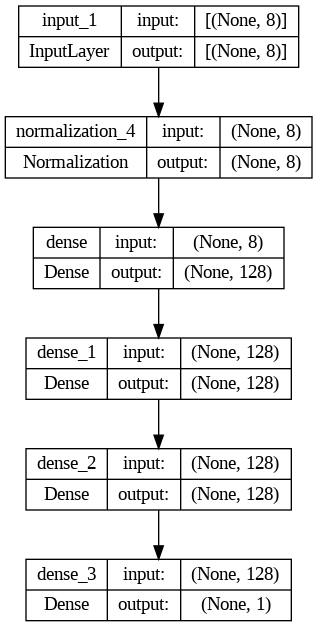

In [42]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [43]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [44]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 3s 15ms/step - loss: 158649.2031 - root_mean_squared_error: 204812.3281 - val_loss: 82369.2500 - val_root_mean_squared_error: 94192.1562
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 58186.1367 - root_mean_squared_error: 72472.6719 - val_loss: 46817.5312 - val_root_mean_squared_error: 60798.3594
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 46148.8398 - root_mean_squared_error: 57841.6992 - val_loss: 42877.9297 - val_root_mean_squared_error: 54704.0234
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 42306.0156 - root_mean_squared_error: 52867.9727 - val_loss: 40387.4805 - val_root_mean_squared_error: 51064.7500
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 41719.6836 - root_mean_squared_error: 51452.3867 - val_loss: 40345.9219 - val_root_mean_squared_error: 50884.2773
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

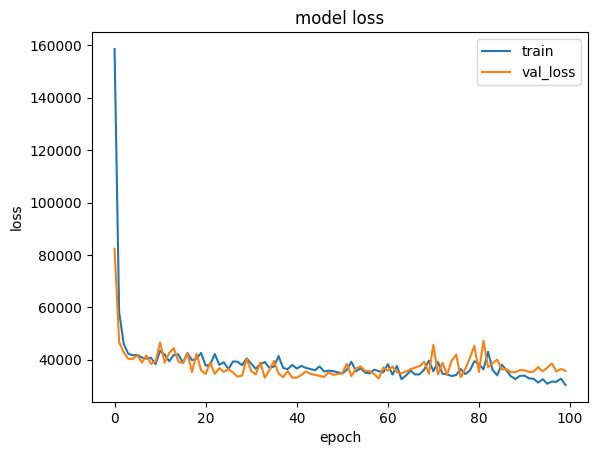

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

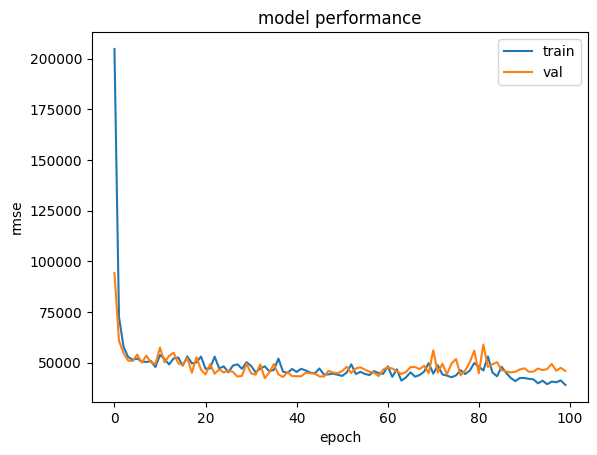

In [46]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## **Model Evaluation and Testing**

In [47]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 42425.3398 - root_mean_squared_error: 50704.3750


[42425.33984375, 50704.375]

In [48]:
X_test.shape

TensorShape([100, 8])

In [49]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 100ms/step


array([[327156.25]], dtype=float32)

In [50]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([314576.5], dtype=float32)>

In [51]:
y_true = list(y_test[:,0].numpy())

In [52]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[327156.22, 224633.73, 454622.4, 110176.73, 257394.9, 145693.88, 173068.3, 277628.94, 386165.12, 466652.06, 499587.12, 245176.48, 360750.03, 183697.5, 420155.0, 128473.23, 272406.84, 237609.95, 257743.69, 278518.12, 448269.72, 269962.62, 139239.94, 519105.34, 413030.8, 319185.2, 339146.84, 127412.695, 328251.9, 234503.7, 206065.3, 192485.89, 188514.89, 248241.44, 387259.1, 464555.16, 324488.88, 428833.2, 98191.914, 219335.84, 167317.56, 135920.53, 118111.23, 497575.4, 541483.8, 187184.08, 315533.72, 128777.76, 219837.78, 235705.11, 280689.9, 416672.9, 302204.66, 345150.66, 324555.88, 206747.94, 120928.99, 391635.3, 142424.47, 356291.75, 289232.8, 271914.16, 414086.53, 390214.34, 176853.36, 362598.7, 70995.89, 299912.0, 489761.03, 337735.5, 419434.72, 153885.19, 430597.75, 479326.88, 415080.0, 181903.0, 167530.25, 319291.16, 279316.1, 355753.84, 272738.5, 378605.2, 423322.9, 135608.39, 431441.38, 451645.16, 253101.1, 159484.72, 430688.6

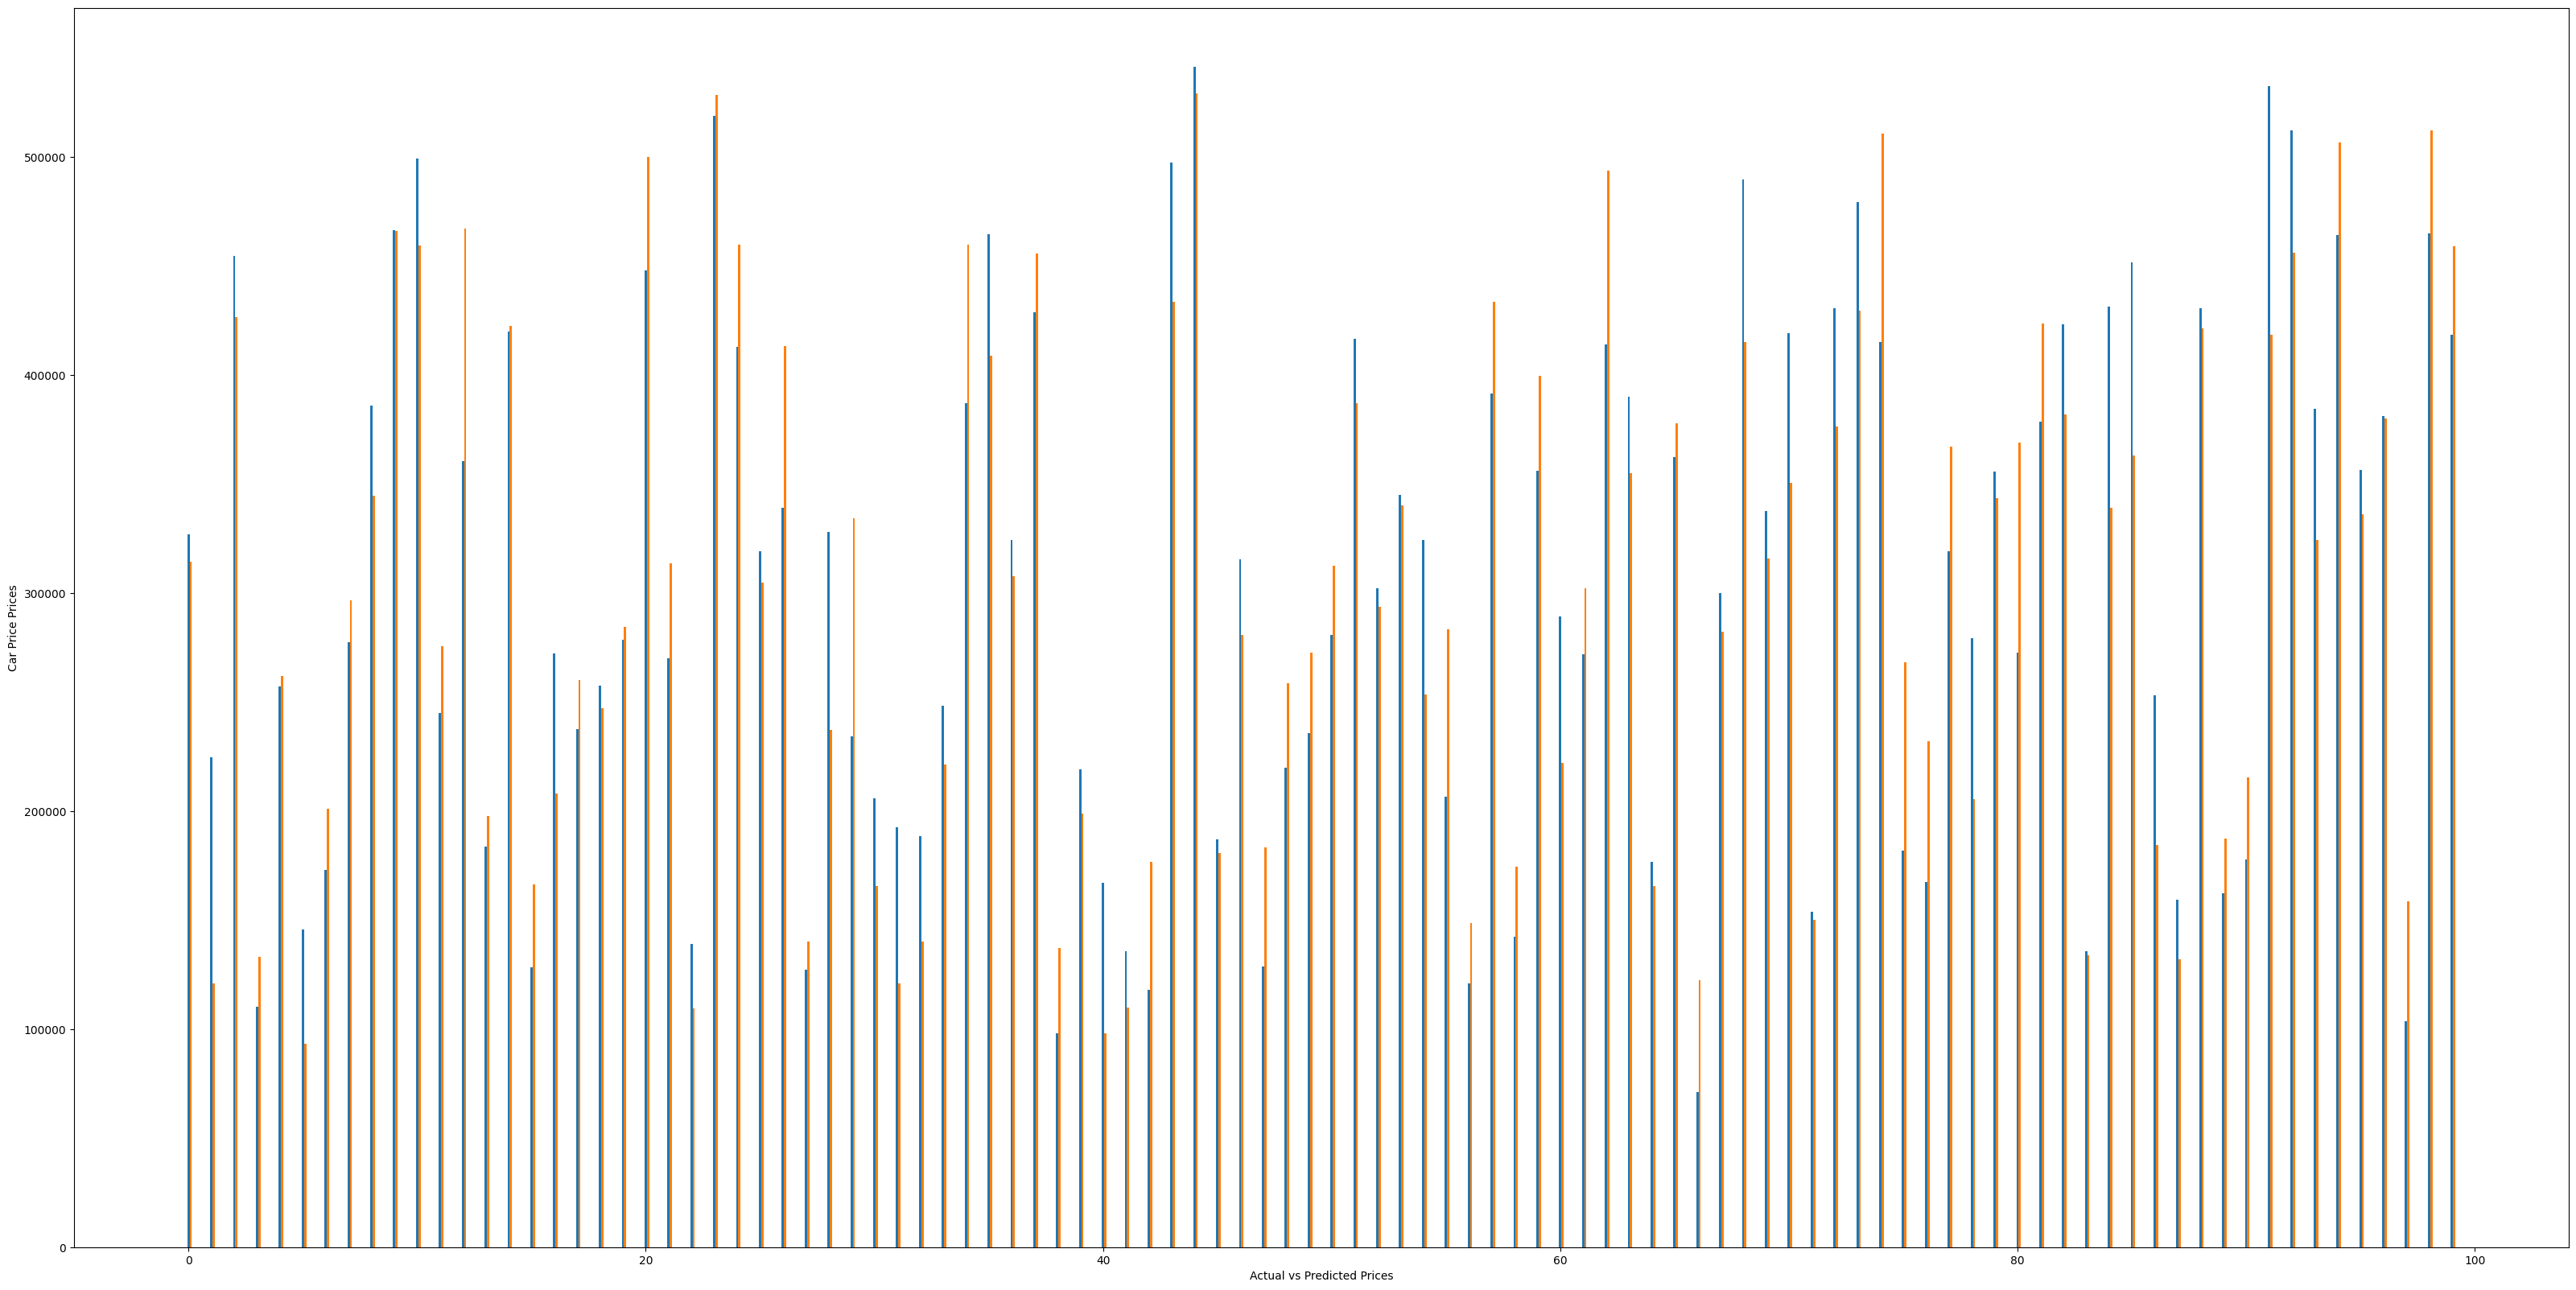

In [53]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()